In [7]:
import pandas as pd

In [8]:
dataset = pd.read_csv("final_dataset.csv")

In [9]:
dataset = dataset.drop("Unnamed: 0", axis=1)

In [10]:
sampled_data = dataset

In [11]:
sampled_data.value_counts("primary_type")

primary_type
THEFT                     450878
ASSAULT                   408412
PUBLIC ORDER CRIMES        95841
OFFENSE AND KIDNAPPING     78881
SEXUAL ASSAULT             10637
DRUGS                        602
Name: count, dtype: int64

In [12]:
category_mapping = {

    'Residential Areas': ['APARTMENT', 'RESIDENCE', 'RESIDENCE - YARD (FRONT / BACK)', 'RESIDENCE - PORCH / HALLWAY', 'RESIDENTIAL YARD (FRONT/BACK)', 'HOUSE', 'GARAGE', 'GANGWAY', 'PORCH', 'YARD', 'ROOMING HOUSE', 'RESIDENCE-GARAGE', 'CHA APARTMENT'],

    'Commercial Areas': ['COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'TAVERN / LIQUOR STORE', 'RESTAURANT', 'SMALL RETAIL STORE', 'BANK', 'GROCERY FOOD STORE', 'DRUG STORE', 'DEPARTMENT STORE', 'CONVENIENCE STORE', 'BARBERSHOP', 'RETAIL STORE', 'BARBER SHOP/BEAUTY SALON', 'CLUB', 'LIQUOR STORE', 'CLEANERS/LAUNDROMAT', 'CLEANING STORE', 'COIN OPERATED MACHINE', 'PAWN SHOP', 'NEWSSTAND', 'BOWLING ALLEY'],

    'Public Spaces': ['PARK PROPERTY', 'PARK', 'PARK PROPERTY', 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'AIRPORT PARKING LOT', 'AIRPORT VENDING ESTABLISHMENT', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'CEMETERY'],

    'Transportation': ['CTA TRAIN', 'CTA BUS', 'CTA BUS STOP', 'CTA PLATFORM', 'CTA TRACKS - RIGHT OF WAY', 'CTA STATION', 'CTA PARKING LOT / GARAGE / OTHER PROPERTY', 'CTA PROPERTY', 'VEHICLE NON-COMMERCIAL', 'VEHICLE - COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE - OTHER RIDE SERVICE', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)', 'TAXICAB'],

    'Educational Institutions': ['SCHOOL - PUBLIC BUILDING', 'SCHOOL - PRIVATE BUILDING', 'SCHOOL, PUBLIC, BUILDING', 'SCHOOL - PRIVATE GROUNDS', 'SCHOOL - PRIVATE GROUNDS', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL YARD', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'COLLEGE/UNIVERSITY GROUNDS'],

    'Miscellaneous Locations': ['ALLEY', 'VACANT LOT / LAND', 'ABANDONED BUILDING', 'VACANT LOT', 'EXPRESSWAY EMBANKMENT', 'RAILROAD PROPERTY', 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'FEDERAL BUILDING', 'BRIDGE', 'AIRPORT/AIRCRAFT', 'HIGHWAY/EXPRESSWAY', 'AIRPORT TRANSPORTATION SYSTEM (ATS)', 'FIRE STATION', 'ANIMAL HOSPITAL', 'JAIL / LOCK-UP FACILITY', 'BOAT/WATERCRAFT']

}
 
category_mapping.update({

    'Residential Areas': category_mapping['Residential Areas'] + ['RESIDENCE PORCH/HALLWAY', 'ROOMING HOUSE'],

    'Commercial Areas': category_mapping['Commercial Areas'] + ['GAS STATION', 'APPLIANCE STORE', 'ATHLETIC CLUB', 'BAR OR TAVERN', 'HOTEL / MOTEL', 'AUTO / BOAT / RV DEALERSHIP', 'GARAGE/AUTO REPAIR', 'TAVERN/LIQUOR STORE', 'SPORTS ARENA/STADIUM', 'FACTORY/MANUFACTURING BUILDING', 'MEDICAL/DENTAL OFFICE', 'CREDIT UNION', 'ATM (AUTOMATIC TELLER MACHINE)', 'SAVINGS AND LOAN', 'MOVIE HOUSE/THEATER', 'VEHICLE-COMMERCIAL', 'DELIVERY TRUCK', 'MEDICAL / DENTAL OFFICE', 'MOVIE HOUSE / THEATER', 'FACTORY / MANUFACTURING BUILDING',],

    'Public Spaces': category_mapping['Public Spaces'] + ['CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'HOSPITAL BUILDING / GROUNDS', 'PARKING LOT/GARAGE(NON.RESID.)', 'CHURCH', 'HOSPITAL', 'CEMETARY', 'CEMETERY', 'SPORTS ARENA / STADIUM', 'LAKEFRONT / WATERFRONT / RIVERBANK','HOSPITAL BUILDING/GROUNDS', 'HOSPITAL BUILDING / GROUNDS', 'MEDICAL/DENTAL OFFICE', 'MEDICAL / DENTAL OFFICE','ANIMAL HOSPITAL','CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP','POLICE FACILITY / VEHICLE PARKING LOT', 'GOVERNMENT BUILDING / PROPERTY', 'FEDERAL BUILDING', 'CHA PARKING LOT', 'FIRE STATION'],

    'Transportation': category_mapping['Transportation'] + ['CTA GARAGE / OTHER PROPERTY', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'AIRPORT EXTERIOR - SECURE AREA','AUTO / BOAT / RV DEALERSHIP', 'TRUCK', 'DELIVERY TRUCK', 'WAREHOUSE', 'GARAGE/AUTO REPAIR', 'CAR WASH','LAKEFRONT/WATERFRONT/RIVERBANK', 'BOAT/WATERCRAFT', 'BOAT / WATERCRAFT'],

    'Educational Institutions': category_mapping['Educational Institutions'] + ['DAY CARE CENTER', 'SCHOOL, PRIVATE, BUILDING', 'SCHOOL - PUBLIC GROUNDS', 'SCHOOL, PRIVATE, GROUNDS'],

    'Miscellaneous Locations': category_mapping['Miscellaneous Locations'] + ['VACANT LOT/LAND', 'POOL ROOM', 'OTHER COMMERCIAL TRANSPORTATION', 'WAREHOUSE', 'CONSTRUCTION SITE', 'OTHER RAILROAD PROP / TRAIN DEPOT', 'GOVERNMENT BUILDING/PROPERTY', 'LIBRARY', 'POLICE FACILITY/VEH PARKING LOT', 'NURSING / RETIREMENT HOME', 'BOAT / WATERCRAFT', 'CHA HALLWAY / STAIRWELL / ELEVATOR', 'OTHER RAILROAD PROPERTY / TRAIN DEPOT'],

    'Streets and Highways': ['STREET', 'SIDEWALK', 'HIGHWAY/EXPRESSWAY', 'DRIVEWAY', 'ALLEY', 'VESTIBULE', 'DRIVEWAY - RESIDENTIAL', 'GAS STATION DRIVE/PROP.', 'LAGOON', 'RIVER BANK', 'STAIRWELL', 'CAR WASH'],


    'Housing and Living Spaces': ['HOTEL/MOTEL', 'PARKING LOT', 'CHA PARKING LOT / GROUNDS', 'CHA PARKING LOT/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'TRUCK', 'BASEMENT', 'JAIL / LOCK-UP FACILITY', 'ANIMAL HOSPITAL'],

    'Recreational Areas': ['PARKING LOT / GARAGE (NON RESIDENTIAL)', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'CLUB', 'TAVERN', 'BARBERSHOP', 'POOL ROOM', 'BOWLING ALLEY', 'SPORTS ARENA/STADIUM'],

    'Other': ['OTHER', 'OTHER (SPECIFY)', 'OTHER COMMERCIAL TRANSPORTATION', 'OTHER RAILROAD PROP / TRAIN DEPOT']

})
 
# Reverse the mapping to create a dictionary for replacement

reverse_mapping = {value: key for key, values in category_mapping.items() for value in values}
 
# Replace the values in the 'Location' column with their respective categories

sampled_data['location_description'] = sampled_data['location_description'].replace(reverse_mapping)
 
# Print the transformed DataFrame

sampled_data

,community_area,primary_type,Arrest,Domestic,location_description,Date,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income,Hour,Day,Month,day_of_week
0,63,OFFENSE AND KIDNAPPING,False,True,Residential Areas,2015-09-24 00:00:00,65.3,12.1,18.5,13.7,22.4,39.0,13605.0,0,24,9,3
1,63,OFFENSE AND KIDNAPPING,False,True,Residential Areas,2014-09-07 00:00:00,65.3,12.1,18.5,13.7,22.4,39.0,13605.0,0,7,9,6
2,30,OFFENSE AND KIDNAPPING,False,True,Residential Areas,2015-06-18 00:00:00,70.6,13.6,30.3,8.7,28.8,35.3,11345.0,0,18,6,3
3,46,PUBLIC ORDER CRIMES,False,False,Residential Areas,2013-08-27 00:00:00,54.9,3.4,28.9,20.3,11.6,41.1,16996.0,0,27,8,1
4,16,THEFT,False,False,Residential Areas,2017-07-14 00:30:00,32.3,3.5,10.3,5.8,10.3,30.2,31043.0,0,14,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045246,68,PUBLIC ORDER CRIMES,False,False,NaN,2017-02-15 09:00:00,70.5,4.0,42.4,34.1,16.1,41.5,12777.0,9,15,2,2
1045247,49,PUBLIC ORDER CRIMES,False,False,NaN,2016-05-15 15:00:00,52.6,2.2,24.0,24.3,9.6,41.8,19755.0,15,15,5,6
1045248,48,PUBLIC ORDER CRIMES,False,False,NaN,2017-01-01 09:20:00,38.4,2.0,13.7,12.3,8.1,37.8,27488.0,9,1,1,6
1045249,44,THEFT,False,True,Residential Areas,2017-09-08 10:00:00,47.9,2.9,26.1,19.0,8.0,37.9,21416.0,10,8,9,4


In [13]:
sampled_data.to_csv("./dataset_final.csv", index=False)

In [13]:
sampled_data = sampled_data.drop("Arrest", axis=1)

In [14]:
numerical_data = dataset[["Domestic","Hardship_Score","Crowded_Housing_Per","Below_Poverty_Household_Income","Unemployment_Rate","No_High_School_Diploma","Under_18_over_64","Per_Capita_Income","Hour","Day","Month"]]
categorical_data = dataset[['primary_type',"location_description"]]

In [84]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

numerical_columns = numerical_data.columns
categorical_columns = categorical_data.columns

# Standardize numerical variables
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)
scaled_numerical_data = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

# One-hot encoding for categorical variables
encoded_categorical_data = pd.get_dummies(categorical_data)

# Combine column names after preprocessing
final_columns = list(scaled_numerical_data.columns) + list(encoded_categorical_data.columns)

# Concatenate preprocessed numerical and categorical data
final_data = pd.concat([scaled_numerical_data, encoded_categorical_data], axis=1)

In [85]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=422)
kmeans.fit(final_data)

KMeans(n_clusters=5, random_state=422)

In [86]:
column_names = list(final_data.columns)
centroids = kmeans.cluster_centers_

# Identify important features
feature_importance = np.abs(centroids[0] - centroids[1])

# Rank features
sorted_indices = np.argsort(feature_importance)[::-1]

# Map indices to real column names
important_features_names = [column_names[idx] for idx in sorted_indices]

# Print mapped feature importance
print("Mapped Feature Importance:")
for name, importance in zip(important_features_names, feature_importance[sorted_indices]):
    print(f"{name}: {importance}")

Mapped Feature Importance:
Per_Capita_Income: 1.7616687851711854
Under_18_over_64: 1.1571340414040703
Hardship_Score: 1.1173229814348384
No_High_School_Diploma: 0.8753110047198623
Crowded_Housing_Per: 0.5135438395140133
Below_Poverty_Household_Income: 0.44585182829027636
Unemployment_Rate: 0.3971499760629259
location_description_Residential Areas: 0.14195583485025043
location_description_Commercial Areas: 0.13289020241429073
primary_type_THEFT: 0.10330426524825836
primary_type_ASSAULT: 0.09265056348896669
Domestic: 0.06267953452626351
primary_type_OFFENSE AND KIDNAPPING: 0.034292865719739905
location_description_Streets and Highways: 0.027631157668297712
primary_type_PUBLIC ORDER CRIMES: 0.025054174178280056
Month: 0.02298790262388885
location_description_Transportation: 0.022780059361715295
location_description_Other: 0.017186201815063473
location_description_Housing and Living Spaces: 0.014342131873895216
Hour: 0.013754859689120822
location_description_Miscellaneous Locations: 0.0108

In [87]:
final_data

,Domestic,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income,Hour,Day,...,location_description_HALLWAY,location_description_Housing and Living Spaces,location_description_Miscellaneous Locations,location_description_Other,location_description_Public Spaces,location_description_RESIDENCE - GARAGE,location_description_Recreational Areas,location_description_Residential Areas,location_description_Streets and Highways,location_description_Transportation
0,2.055519,1.190056,2.944609,-0.449174,0.004028,1.925349,0.658629,-0.793266,-1.949389,0.943383,...,False,False,False,False,False,False,False,True,False,False
1,2.055519,1.190056,2.944609,-0.449174,0.004028,1.925349,0.658629,-0.793266,-1.949389,-0.972454,...,False,False,False,False,False,False,False,True,False,False
2,2.055519,1.480998,3.500805,0.697266,-0.606379,2.991255,0.167008,-0.898341,-1.949389,0.267205,...,False,False,False,False,False,False,False,True,False,False
3,-0.486495,0.619150,-0.281327,0.561248,0.809765,0.126632,0.937657,-0.635607,-1.949389,1.281471,...,False,False,False,False,False,False,False,True,False,False
4,-0.486495,-0.621471,-0.244248,-1.245852,-0.960414,-0.089880,-0.510631,0.017483,-1.949389,-0.183580,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045246,-0.486495,1.475508,-0.058849,1.872853,2.494488,0.876097,0.990805,-0.831762,-0.586478,-0.070884,...,False,False,False,False,False,False,False,False,False,False
1045247,-0.486495,0.492892,-0.726284,0.085184,1.298091,-0.206464,1.030666,-0.507332,0.322129,-0.070884,...,False,False,False,False,False,False,False,False,False,False
1045248,-0.486495,-0.286613,-0.800443,-0.915522,-0.166886,-0.456285,0.499185,-0.147800,-0.586478,-1.648631,...,False,False,False,False,False,False,False,False,False,False
1045249,2.055519,0.234887,-0.466726,0.289211,0.651059,-0.472940,0.512472,-0.430107,-0.435044,-0.859758,...,False,False,False,False,False,False,False,True,False,False


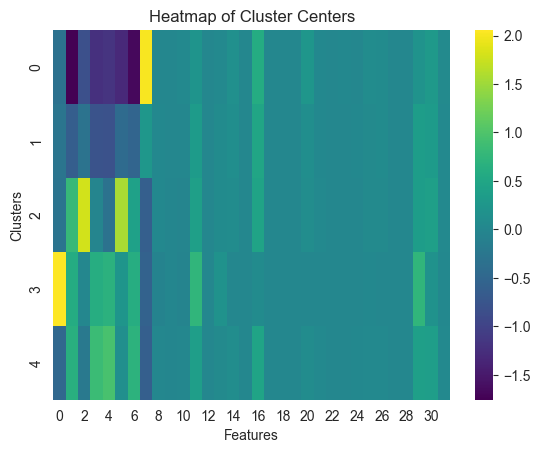

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Assuming 'kmeans' is your trained KMeans model and 'final_data' is your preprocessed data
cluster_centers = kmeans.cluster_centers_
sns.heatmap(cluster_centers, cmap='viridis')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.title('Heatmap of Cluster Centers')
plt.show()

In [89]:
final_data['clusters'] = kmeans.fit_predict(final_data)

In [90]:
# Assuming 'final_data' is your DataFrame
 
# List of original values/columns for 'primary_type'
primary_type_cols = [col for col in final_data.columns if col.startswith('primary_type_')]
# Convert back to categorical column
final_data['primary_type'] = final_data[primary_type_cols].idxmax(axis=1)
final_data['primary_type'] = final_data['primary_type'].apply(lambda x: x.split('primary_type_')[1])
 
# List of original values/columns for 'location_description'
location_description_cols = [col for col in final_data.columns if col.startswith('location_description_')]
# Convert back to categorical column
final_data['location_description'] = final_data[location_description_cols].idxmax(axis=1)
final_data['location_description'] = final_data['location_description'].apply(lambda x: x.split('location_description_')[1])
 
# Drop the one-hot encoded columns from the DataFrame
final_data.drop(columns=primary_type_cols + location_description_cols, inplace=True)

final_data

,Domestic,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income,Hour,Day,Month,clusters,primary_type,location_description
0,2.055519,1.190056,2.944609,-0.449174,0.004028,1.925349,0.658629,-0.793266,-1.949389,0.943383,0.707089,2,OFFENSE AND KIDNAPPING,Residential Areas
1,2.055519,1.190056,2.944609,-0.449174,0.004028,1.925349,0.658629,-0.793266,-1.949389,-0.972454,0.707089,2,OFFENSE AND KIDNAPPING,Residential Areas
2,2.055519,1.480998,3.500805,0.697266,-0.606379,2.991255,0.167008,-0.898341,-1.949389,0.267205,-0.190127,2,OFFENSE AND KIDNAPPING,Residential Areas
3,-0.486495,0.619150,-0.281327,0.561248,0.809765,0.126632,0.937657,-0.635607,-1.949389,1.281471,0.408017,4,PUBLIC ORDER CRIMES,Residential Areas
4,-0.486495,-0.621471,-0.244248,-1.245852,-0.960414,-0.089880,-0.510631,0.017483,-1.949389,-0.183580,0.108945,1,THEFT,Residential Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045246,-0.486495,1.475508,-0.058849,1.872853,2.494488,0.876097,0.990805,-0.831762,-0.586478,-0.070884,-1.386417,4,PUBLIC ORDER CRIMES,AIRCRAFT
1045247,-0.486495,0.492892,-0.726284,0.085184,1.298091,-0.206464,1.030666,-0.507332,0.322129,-0.070884,-0.489200,4,PUBLIC ORDER CRIMES,AIRCRAFT
1045248,-0.486495,-0.286613,-0.800443,-0.915522,-0.166886,-0.456285,0.499185,-0.147800,-0.586478,-1.648631,-1.685489,1,PUBLIC ORDER CRIMES,AIRCRAFT
1045249,2.055519,0.234887,-0.466726,0.289211,0.651059,-0.472940,0.512472,-0.430107,-0.435044,-0.859758,0.707089,3,THEFT,Residential Areas


In [91]:
# 1. Inverse Standardization
inverse_scaled_numerical_data = pd.DataFrame(scaler.inverse_transform(scaled_numerical_data), columns=numerical_columns)


# Concatenate inverse transformed numerical and categorical data
final_inverse_data = pd.concat([inverse_scaled_numerical_data], axis=1)
final_inverse_data

,Domestic,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income,Hour,Day,Month
0,1.0,65.3,12.1,18.5,13.7,22.4,39.0,13605.0,0.0,24.0,9.0
1,1.0,65.3,12.1,18.5,13.7,22.4,39.0,13605.0,0.0,7.0,9.0
2,1.0,70.6,13.6,30.3,8.7,28.8,35.3,11345.0,0.0,18.0,6.0
3,0.0,54.9,3.4,28.9,20.3,11.6,41.1,16996.0,0.0,27.0,8.0
4,0.0,32.3,3.5,10.3,5.8,10.3,30.2,31043.0,0.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1045246,0.0,70.5,4.0,42.4,34.1,16.1,41.5,12777.0,9.0,15.0,2.0
1045247,0.0,52.6,2.2,24.0,24.3,9.6,41.8,19755.0,15.0,15.0,5.0
1045248,0.0,38.4,2.0,13.7,12.3,8.1,37.8,27488.0,9.0,1.0,1.0
1045249,1.0,47.9,2.9,26.1,19.0,8.0,37.9,21416.0,10.0,8.0,9.0


In [92]:
for column in list(numerical_columns):
    final_data[column] = final_inverse_data[column]

In [93]:
final_data.columns

Index(['Domestic', 'Hardship_Score', 'Crowded_Housing_Per',
       'Below_Poverty_Household_Income', 'Unemployment_Rate',
       'No_High_School_Diploma', 'Under_18_over_64', 'Per_Capita_Income',
       'Hour', 'Day', 'Month', 'clusters', 'primary_type',
       'location_description'],
      dtype='object')

In [94]:
cluster_1 = final_data[final_data['clusters'] == 1]

In [95]:
cluster_1.value_counts("primary_type")

primary_type
THEFT                     110378
ASSAULT                    71881
PUBLIC ORDER CRIMES        25957
OFFENSE AND KIDNAPPING     16909
SEXUAL ASSAULT              2324
DRUGS                        131
Name: count, dtype: int64

In [96]:
cluster_2 = final_data[final_data['clusters'] == 2]
cluster_2.value_counts("primary_type")


primary_type
THEFT                     70816
ASSAULT                   58789
PUBLIC ORDER CRIMES       12923
OFFENSE AND KIDNAPPING    10083
SEXUAL ASSAULT             1714
DRUGS                        93
Name: count, dtype: int64

In [97]:
cluster_0 = final_data[final_data['clusters'] == 0]
cluster_0.value_counts("primary_type")

primary_type
THEFT                     97193
ASSAULT                   36872
PUBLIC ORDER CRIMES       22981
OFFENSE AND KIDNAPPING     6615
SEXUAL ASSAULT             1481
DRUGS                        68
Name: count, dtype: int64

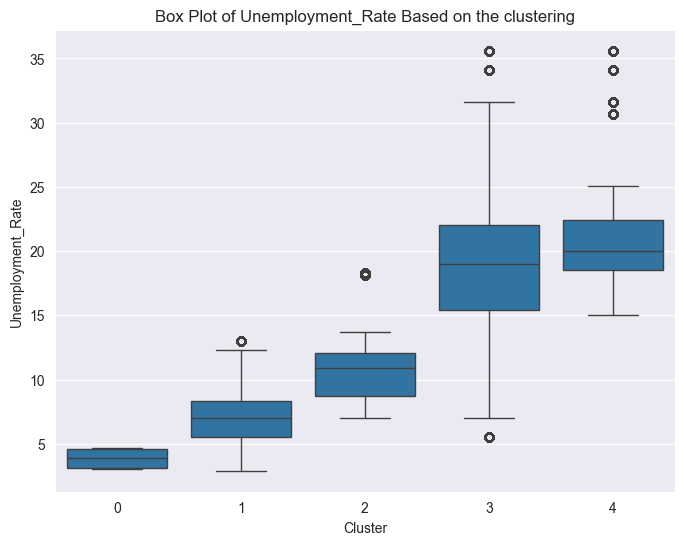

In [98]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='clusters', y='Unemployment_Rate', data=final_data)
plt.title('Box Plot of Unemployment_Rate Based on the clustering')
plt.xlabel('Cluster')
plt.ylabel('Unemployment_Rate')
plt.show()

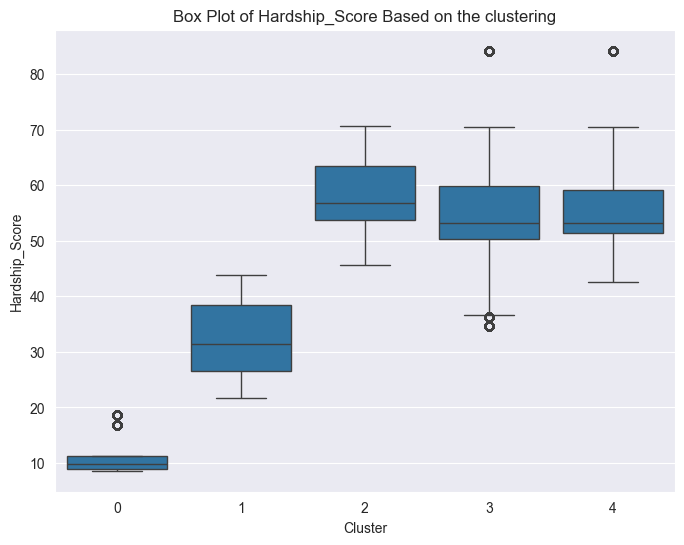

In [99]:
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='clusters', y='Hardship_Score', data=final_data)
plt.title('Box Plot of Hardship_Score Based on the clustering')
plt.xlabel('Cluster')
plt.ylabel('Hardship_Score')
plt.show()

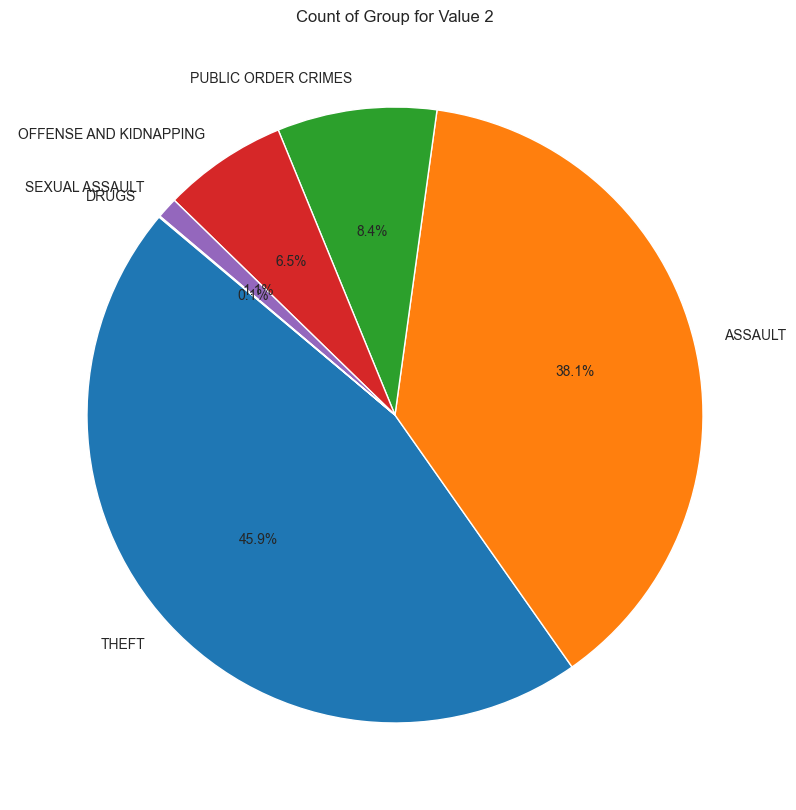

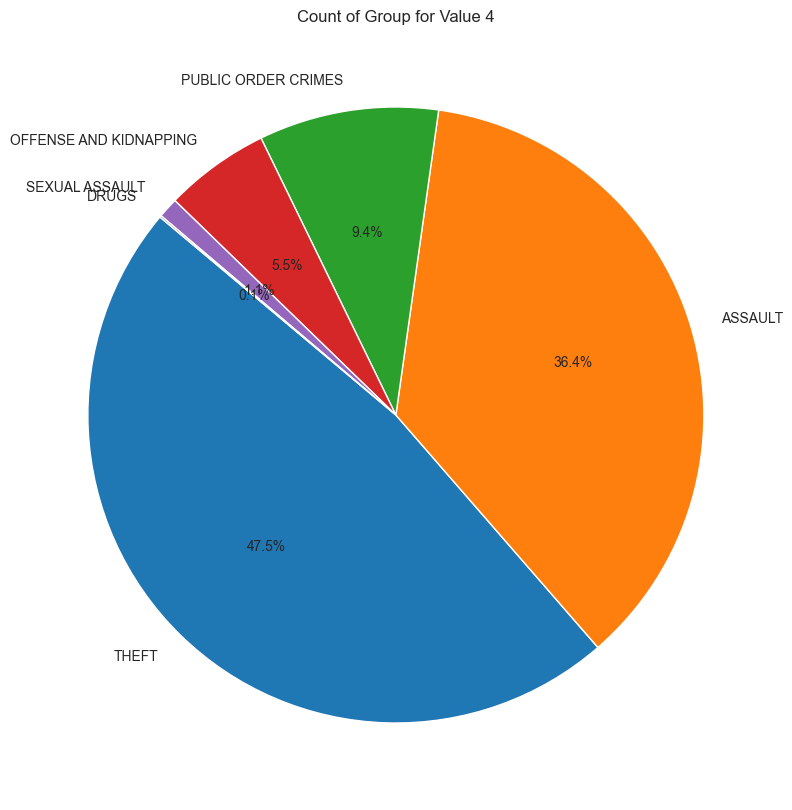

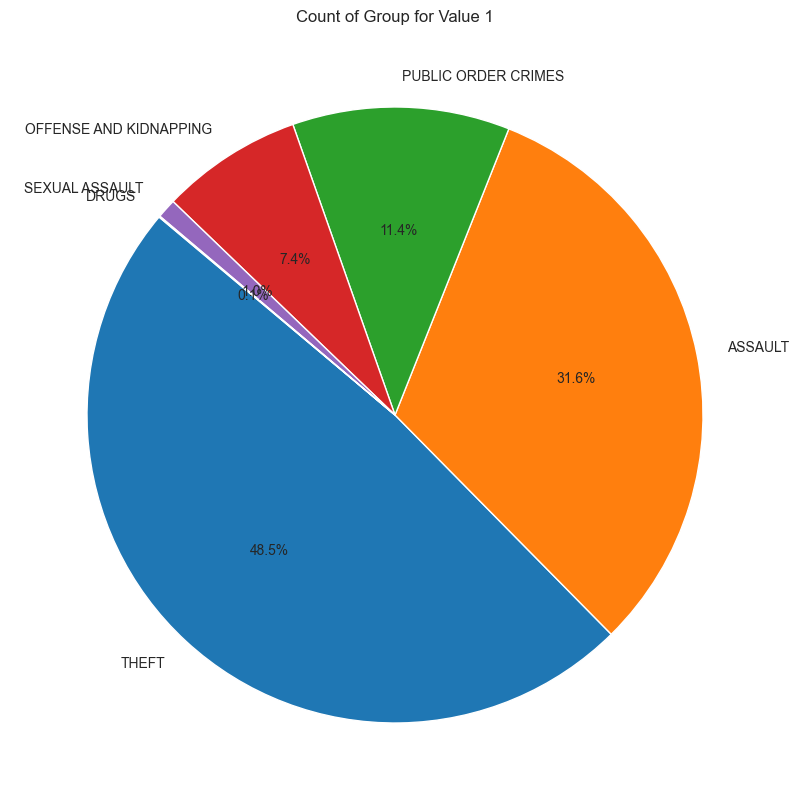

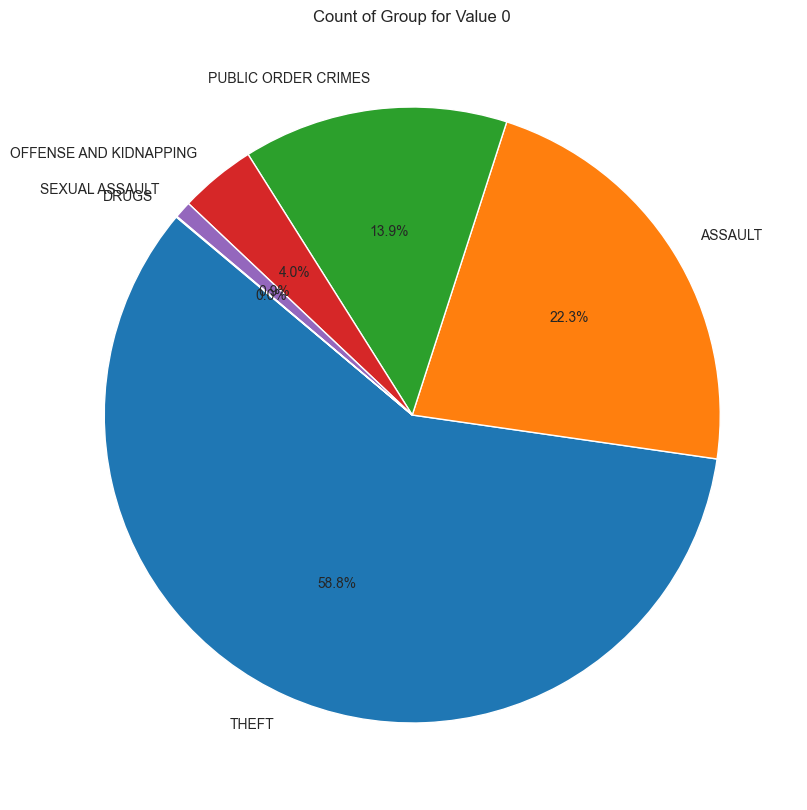

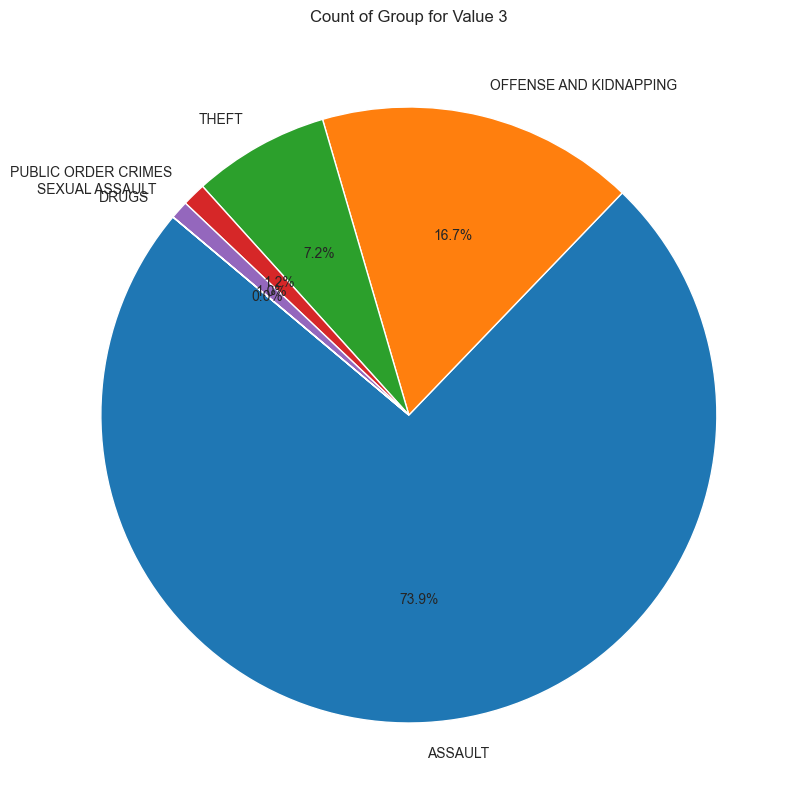

In [100]:
group_counts = final_data.groupby('clusters')["primary_type"].value_counts()
unique_values = final_data['clusters'].unique()
for value in unique_values:
    counts = group_counts[value]
    plt.figure(figsize=(10, 10))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Count of Group for Value {value}')
    plt.show()

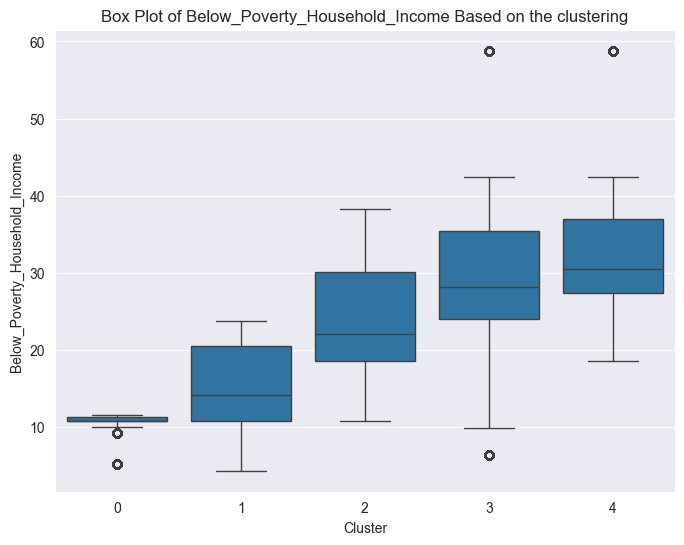

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='clusters', y='Below_Poverty_Household_Income', data=final_data)
plt.title('Box Plot of Below_Poverty_Household_Income Based on the clustering')
plt.xlabel('Cluster')
plt.ylabel('Below_Poverty_Household_Income')
plt.show()

In [102]:
final_data.groupby("clusters").count()

,Domestic,Hardship_Score,Crowded_Housing_Per,Below_Poverty_Household_Income,Unemployment_Rate,No_High_School_Diploma,Under_18_over_64,Per_Capita_Income,Hour,Day,Month,primary_type,location_description
clusters,,,,,,,,,,,,,
0,165210,165210,165210,165210,165210,165210,165210,165210,165210,165210,165210,165210,165210
1,227580,227580,227580,227580,227580,227580,227580,227580,227580,227580,227580,227580,227580
2,154418,154418,154418,154418,154418,154418,154418,154418,154418,154418,154418,154418,154418
3,158853,158853,158853,158853,158853,158853,158853,158853,158853,158853,158853,158853,158853
4,339190,339190,339190,339190,339190,339190,339190,339190,339190,339190,339190,339190,339190
